# Computer Science 4442B Assignment 2
## By: Samar Sajnani (250633960)

## Data set

We will be gathering the Titanic dataset that contains categorical, numerical and survival information regarding individuals that were on-board the Titanic. 

The training set has 891 individuals with survival information, the testing set has around 418 individuals without survival data, and the gender_submissions data set is an example of the kaggle output needed.

## Goal

The goal is to predict the survival of a group of 418 individuals by training a machine learning model using a training set of 891 individuals using sci-kit learn. After the prediction is made the data is then submitted to Kaggle to determine the actual accuracy with which the prediction was made.

### Utility Functions for Saving Plots

In [1882]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals
from sklearn.linear_model import LinearRegression

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "../../TitanicKaggle/images")

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# Step 1: Get the data

Here we set some utility functions to gather the data from my Github project and unzip it. Once unzipped the data is the loaded as pandas dataframes. 

In [1883]:
import os
import zipfile
from six.moves import urllib

DOWNLOAD_ROOT = "https://github.com/ssajnani/TitanicKaggle/raw/master/"
TITANIC_PATH = os.path.join("../../TitanicKaggle", "data")
TITANIC_URL = DOWNLOAD_ROOT + "data/titanic.zip"
files = os.listdir(os.curdir) 
def fetch_titanic_data(titanic_url=TITANIC_URL, titanic_path=TITANIC_PATH):
    if not os.path.isdir(titanic_path):
        os.makedirs(titanic_path)
    zip_path = os.path.join(titanic_path, "titanic.zip")
    urllib.request.urlretrieve(titanic_url, zip_path)
    titanic_zip = zipfile.ZipFile(zip_path)
    titanic_zip.extractall(path=titanic_path)
    titanic_zip.close()

In [1884]:
fetch_titanic_data()

In [1885]:
import pandas as pd

def load_titanic_data(file_name='train.csv', titanic_path=TITANIC_PATH):
    csv_path = os.path.join(titanic_path, file_name)
    return pd.read_csv(csv_path)

## a) Gather Training Set (891 Individuals)

The data contains numeric information, specifically: Age, Fare, SibSp, Parch, Pclass and PassengerId. 

The categorical non-numerica data includes Sex, Pclass, Embarked, Cabin, Name and Ticket

The value of SibSp stands for the individuals travelling with any number of siblings and spouses. 

The value of Parch stands for the individuals travelling with any number of parents and children. 

The Pclass parameter stands for the cabin class which ranges from 1 to 3. 

In [1886]:
titanic_temp = load_titanic_data()
titanic_temp.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## b) Gather Testing Set (418 Individuals)

Contains all the same column values as the training set, except for the 'Survived' column.

In [1887]:
titanic_test = load_titanic_data('test.csv')
titanic_test.head(20)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


## c) Gather Submission Format Set

Get the example submission dataframe, used to model our output in the future.

In [1888]:
submission_test = load_titanic_data('gender_submission.csv')
submission_test.head(20)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


## d) Look for NaN values

Below we look at the possible NaN values in the training set. We see that the NaN values for non-numeric data like Cabin, Embarked, Sex, Pclass, etc is difficult to predict because there is no numeric value it is associated with. For numerical data we can simply get the mean or median of the values.

In [1889]:
titanic_temp.info()
titanic_temp.isna().any()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

## e) Look at Plots to Understand Variable Range

Below we see the frequency of age, far, parch, PassengerId, Pclass, SibSp, and  Survived data in a histogram format. We can see Parch varies from 0 to 6, SibSp varies from 0 to 8, and Pclass from 1 to 3 with discrete steps of one,

Saving figure attribute_histogram_plots


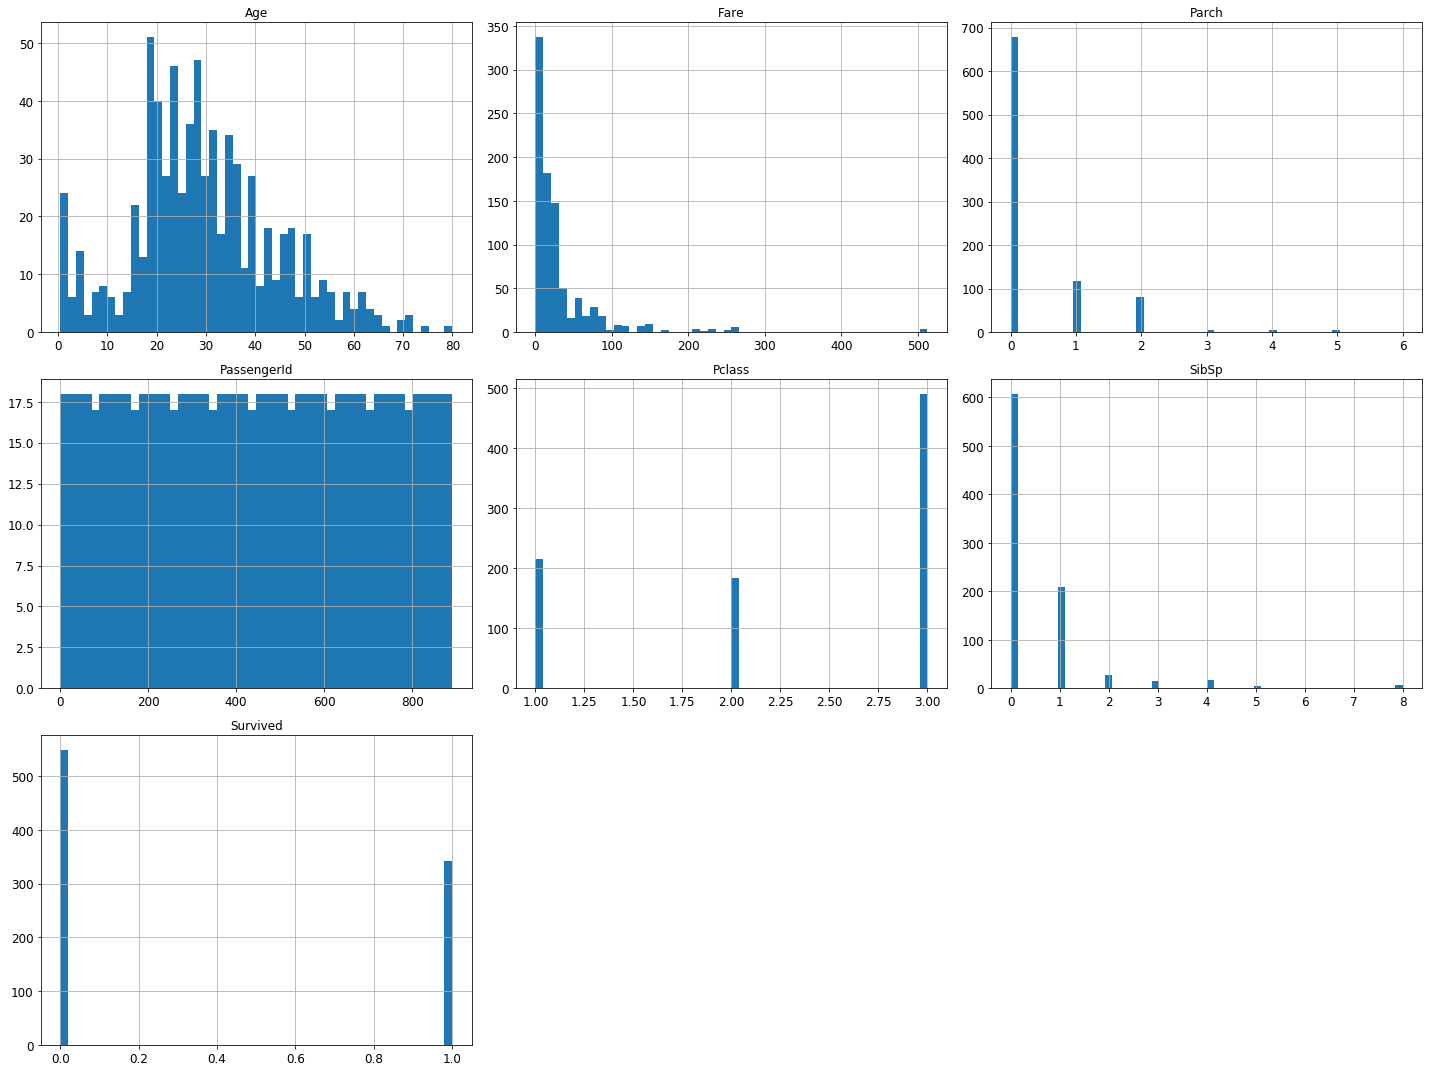

In [1893]:
%matplotlib inline
import matplotlib.pyplot as plt
titanic_temp.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

In [1894]:
# to make this notebook's output identical at every run
np.random.seed(42)

In [1895]:
train_set, test_set = titanic, titanic_test
print(len(train_set), "train +", len(test_set), "test")

891 train + 418 test


## f) Look at Cabin Values

Based on information from online, the Titanic had eight cabin levels: A, B, C, D, E, F, G, T. The cabin numbers are a range of integers from zero upwards.


In [1896]:
titanic_temp['Cabin'].dropna().head(10)

1             C85
3            C123
6             E46
10             G6
11           C103
21            D56
23             A6
27    C23 C25 C27
31            B78
52            D33
Name: Cabin, dtype: object

# Step 2: Visualize the Data

Here we create some plots to analyze any possible trends and to strategize based on this information.

In [1897]:

titanic_copy = titanic_temp.copy()

## a) Look at Plots of Survived vs. Others

Looks like there is a trend with Fare, SibSp, and Age. We cannot see the datapoints in graph of Parch and Pclass too well so we cannot identify if there is a trend purely from the graph. 


Saving figure bad_visualization_plot


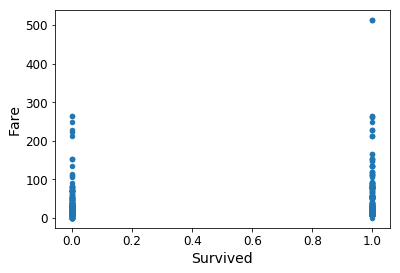

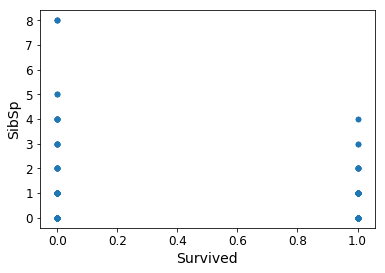

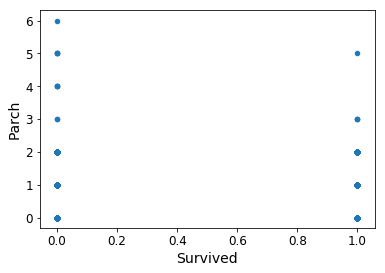

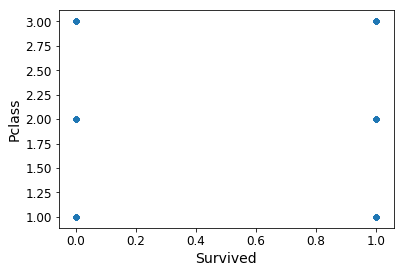

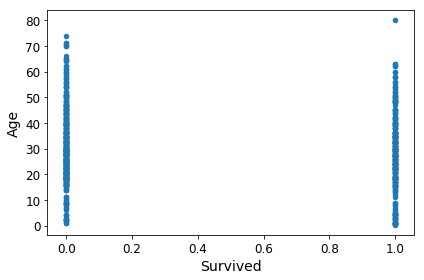

In [1898]:
titanic_copy.plot(kind="scatter", x='Survived', y='Fare')
titanic_copy.plot(kind="scatter", x='Survived', y='SibSp')
titanic_copy.plot(kind="scatter", x='Survived', y='Parch')
titanic_copy.plot(kind="scatter", x='Survived', y='Pclass')
titanic_copy.plot(kind="scatter", x='Survived', y='Age')

save_fig("bad_visualization_plot")

## b) Get a Correlation View of Survived

Based on the r-values of the correlation matrix it seems the greatest correlation of Survived is with the Pclass variable, corresponding to a negative relation.

Second largest correlation is with the Fare variable, seems SibSp has a very small, almost non-existent correlation, followed by Age and Parch.

Order of correlation: Pclass, Fare, Parch, Age, SibSp

In [1899]:
corr_matrix = titanic_copy.corr()

In [1900]:
corr_matrix["Survived"].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

## c) Get a Correlation View of Correlated Variables

For Pclass the biggest correlations are with Fare and Age

For Fare the biggest correlations are with Pclass, Parch, SibSp (SibSp seems to be significant here)

For Parch the biggest correlation is SibSp, Fare, and Age

For Age the biggest correlations are Pclass, SibSp, and Parch (SibSp seems significant here too)

In [1901]:
print(corr_matrix["Pclass"].sort_values(ascending=False))
print(corr_matrix["Fare"].sort_values(ascending=False))
print(corr_matrix["Parch"].sort_values(ascending=False))
print(corr_matrix["Age"].sort_values(ascending=False))

Pclass         1.000000
SibSp          0.083081
Parch          0.018443
PassengerId   -0.035144
Survived      -0.338481
Age           -0.369226
Fare          -0.549500
Name: Pclass, dtype: float64
Fare           1.000000
Survived       0.257307
Parch          0.216225
SibSp          0.159651
Age            0.096067
PassengerId    0.012658
Pclass        -0.549500
Name: Fare, dtype: float64
Parch          1.000000
SibSp          0.414838
Fare           0.216225
Survived       0.081629
Pclass         0.018443
PassengerId   -0.001652
Age           -0.189119
Name: Parch, dtype: float64
Age            1.000000
Fare           0.096067
PassengerId    0.036847
Survived      -0.077221
Parch         -0.189119
SibSp         -0.308247
Pclass        -0.369226
Name: Age, dtype: float64


## d) Get a Plot View of Correlated Variables

Saving figure scatter_matrix_plot


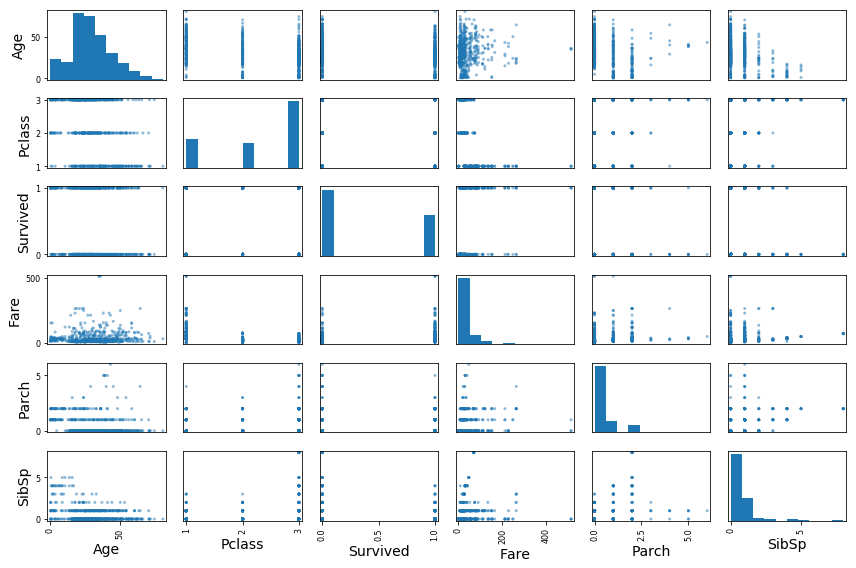

In [1902]:
# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas
from pandas.plotting import scatter_matrix

attributes = ["Age", "Pclass", "Survived", "Fare", "Parch", "SibSp"]
scatter_matrix(titanic_copy[attributes], figsize=(12, 8))
save_fig("scatter_matrix_plot")

## e) Investigate Potential New Alone Parameter from Parch and SibSp

In [1903]:
family_size = titanic_copy["Parch"] + titanic_copy["SibSp"] + 1
titanic_copy['alone'] = 1
titanic_copy.loc[family_size > 1, 'alone'] = 0
print(titanic_copy['alone'].value_counts())


1    537
0    354
Name: alone, dtype: int64


Note: there was a bug in the previous cell, in the definition of the `rooms_per_household` attribute. This explains why the correlation value below differs slightly from the value in the book (unless you are reading the latest version).

## f) New Alone Parameter has a Larger Correlation with Survived than Parch or SibSp

In [1904]:
corr_matrix = titanic_copy.corr()
corr_matrix["Survived"].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
alone         -0.203367
Pclass        -0.338481
Name: Survived, dtype: float64

Below is the final result of our analysis and modification

In [1905]:
titanic_copy.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,alone
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.602694
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.489615
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


# Step 3: Prepare the Data for Machine Learning

Here we take our numeric variables and replace their NaN values. Additionally, we take the categorical values and convert them to numeric values using One-hot encoding.

First, we take the Cabin and Prefix from the name and convert them into Cabin_Letter (Categorical), Cabin_Number (Numeric) and Prefix (Categorical)

## a) Extract Variables from String Variables

First, we take the Cabin and Prefix from the name and convert them into Cabin_Letter (Categorical), Cabin_Number (Numeric) and Prefix (Categorical). 

Gathering cabin data because it can be connected to class and which level in the Titanic and individual is. The Cabin numbers may specify where longitudinally and individual was located on the Titanic.

/home/ssajnani/env/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  # Remove the CWD from sys.path while we load stuff.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
PassengerId     891 non-null int64
Survived        891 non-null int64
Pclass          891 non-null int64
Name            891 non-null object
Sex             891 non-null object
Age             714 non-null float64
SibSp           891 non-null int64
Parch           891 non-null int64
Ticket          891 non-null object
Fare            891 non-null float64
Cabin           204 non-null object
Embarked        889 non-null object
alone           891 non-null int64
Cabin_Number    196 non-null float64
Cabin_Letter    204 non-null object
Prefix          891 non-null object
dtypes: float64(3), int64(6), object(7)
memory usage: 111.5+ KB
None


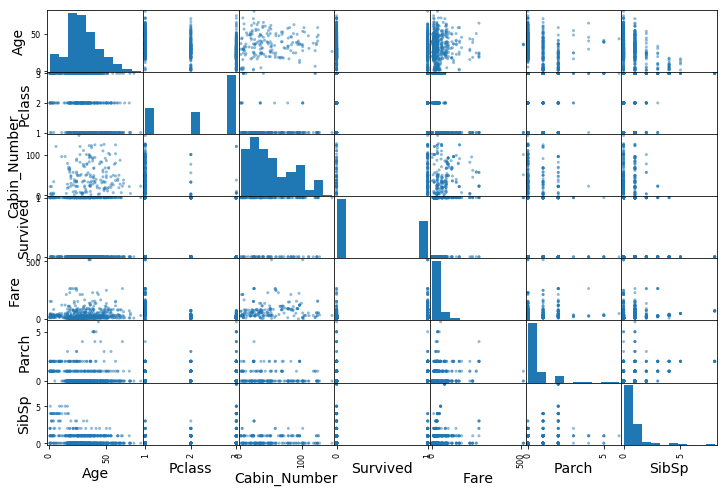

In [1906]:
# Cut out the Cabin Letter from the Cabin Number and concat it to the 
# dataframe we already have
temp_copy = pd.concat([titanic_copy, titanic_copy['Cabin'].str.slice(start=1).str.split(" ", n = 1, expand = True)[0], titanic_copy['Cabin'].str.slice(stop=1)], axis=1)
temp_copy.columns.values[14] = "Cabin_Letter"
temp_copy.rename(columns = {0: "Cabin_Number"}, inplace = True)

# Convert Cabin_Number to a numeric value
temp_copy.loc[temp_copy.Cabin.isnull(), "Cabin_Number"] = np.nan
temp_copy['Cabin_Number'] = temp_copy['Cabin_Number'].fillna(-1)
temp_copy['Cabin_Number'] = temp_copy.Cabin_Number.convert_objects(convert_numeric=True)
temp_copy['Cabin_Number'] = temp_copy['Cabin_Number'].replace(-1, np.nan)

attributes = ["Age", "Pclass", "Cabin_Number", "Survived", "Fare", "Parch", "SibSp"]
scatter_matrix(temp_copy[attributes], figsize=(12, 8))

# Gather individual's name prefix or title
temp_copy['Prefix'] = temp_copy['Name'].str.split(',', n=1, expand=True)[1].str.split('.', n=1, expand=True)[0]
print(temp_copy.info())
titanic_temp = temp_copy

### Drop any unneeded variables from dataframe

In [1907]:

titanic_results = titanic_temp['Survived'].copy()
titanic = titanic_temp.drop(["Survived","Name", "Ticket","Cabin"], axis=1) # drop labels for training set
print(titanic.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId     891 non-null int64
Pclass          891 non-null int64
Sex             891 non-null object
Age             714 non-null float64
SibSp           891 non-null int64
Parch           891 non-null int64
Fare            891 non-null float64
Embarked        889 non-null object
alone           891 non-null int64
Cabin_Number    196 non-null float64
Cabin_Letter    204 non-null object
Prefix          891 non-null object
dtypes: float64(3), int64(5), object(4)
memory usage: 83.6+ KB
None


In [1908]:
# sample_incomplete_rows.drop("total_bedrooms", axis=1)       # option 2

**Warning**: Since Scikit-Learn 0.20, the `sklearn.preprocessing.Imputer` class was replaced by the `sklearn.impute.SimpleImputer` class.

## b) Use a Imputer to set NaN values of Numeric Variables to Mean/Median (Data Cleaning)

Mean is used because it is not susceptible to being affected by 

In [1909]:
try:
    from sklearn.impute import SimpleImputer # Scikit-Learn 0.20+
except ImportError:
    from sklearn.preprocessing import Imputer as SimpleImputer

imputer = SimpleImputer(strategy="mean")

Remove the text attribute because median can only be calculated on numerical attributes:

In [1910]:
titanic_num = titanic.drop(['Sex', 'Cabin_Letter', 'Embarked', 'Prefix'], axis=1)
print(titanic_num.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
PassengerId     891 non-null int64
Pclass          891 non-null int64
Age             714 non-null float64
SibSp           891 non-null int64
Parch           891 non-null int64
Fare            891 non-null float64
alone           891 non-null int64
Cabin_Number    196 non-null float64
dtypes: float64(3), int64(5)
memory usage: 55.8 KB
None


In [1911]:
imputer.fit(titanic_num)

SimpleImputer(copy=True, fill_value=None, missing_values=nan, strategy='mean',
       verbose=0)

In [1912]:
imputer.statistics_

array([4.46000000e+02, 2.30864198e+00, 2.96991176e+01, 5.23007856e-01,
       3.81593715e-01, 3.22042080e+01, 6.02693603e-01, 5.01020408e+01])

Check that this is the same as manually computing the median of each attribute:

In [1913]:
titanic_num.median().values

array([446.    ,   3.    ,  28.    ,   0.    ,   0.    ,  14.4542,
         1.    ,  40.5   ])

Transform the training set:

In [1914]:
X = imputer.transform(titanic_num)

In [1915]:
titanic_tr = pd.DataFrame(X, columns=titanic_num.columns,
                          index = list(titanic.index.values))

In [1916]:
titanic_tr.loc[titanic.index.values]

,PassengerId,Pclass,Age,SibSp,Parch,Fare,alone,Cabin_Number
0,1.0,3.0,22.000000,1.0,0.0,7.2500,0.0,50.102041
1,2.0,1.0,38.000000,1.0,0.0,71.2833,0.0,85.000000
2,3.0,3.0,26.000000,0.0,0.0,7.9250,1.0,50.102041
3,4.0,1.0,35.000000,1.0,0.0,53.1000,0.0,123.000000
4,5.0,3.0,35.000000,0.0,0.0,8.0500,1.0,50.102041
5,6.0,3.0,29.699118,0.0,0.0,8.4583,1.0,50.102041
6,7.0,1.0,54.000000,0.0,0.0,51.8625,1.0,46.000000
7,8.0,3.0,2.000000,3.0,1.0,21.0750,0.0,50.102041
8,9.0,3.0,27.000000,0.0,2.0,11.1333,0.0,50.102041
9,10.0,2.0,14.000000,1.0,0.0,30.0708,0.0,50.102041


In [1917]:
imputer.strategy

'mean'

## c) Use a Category Encoder for One-Hot Encoding (Feature Scaling)

Now let's preprocess the categorical input features: `Sex`, `Cabin_Letter`, `Embarked`, `Prefix`. One-hot encoding is used to encode categorical variables as binary values.

### Clean the Categorical Data by Replacing with Median or N/A

In the for loop the first if condition limits the variables for prefix to a small set of majority values: Miss, Mrs, Master, Dr, Rev. The second if statement, sets the NaN values for Embarked with the mode of Embarked values. 

The reason that Embarked is replaced by the mode is because it is only NaN in a very small number around 2-3 rows in the entire dataset. For columns like Cabin_Letter there are way too many NaNs. 

In fact, there are so many NaN values that they make around 75% of all the Cabin values. Therefore, I decided to maintain these NaN values by replacing them with a new category.

The last if statement set the NaN value of any other categorical variables to N/A. 

In [1918]:


for i in ['Sex', 'Embarked', 'Cabin_Letter', 'Prefix']:
    test_pre = [' Miss',' Mrs',' Master',' Dr', ' Rev']
    if i == 'Prefix':
        titanic[i].fillna('N/A', inplace=True) # option 3
        titanic.loc[~titanic[i].isin(test_pre), [i]] = 'N/A'
    elif i == "Embarked":
        titanic[i].fillna(titanic['Embarked'].describe()['top'], inplace=True) # option 3
    else:
        titanic[i].fillna('N/A', inplace=True) # option 3

In [1919]:
titanic_cat = titanic[[ 'Sex', 'Embarked', 'Cabin_Letter', 'Prefix']]
titanic_cat.head(10)

,Sex,Embarked,Cabin_Letter,Prefix
0,male,S,N/A,N/A
1,female,C,C,Mrs
2,female,S,N/A,Miss
3,female,S,C,Mrs
4,male,S,N/A,N/A
5,male,Q,N/A,N/A
6,male,S,E,N/A
7,male,S,N/A,Master
8,female,S,N/A,Mrs
9,female,C,N/A,Mrs


**Warning**: earlier versions of the book used the `LabelEncoder` class or Pandas' `Series.factorize()` method to encode string categorical attributes as integers. However, the `OrdinalEncoder` class that was introduced in Scikit-Learn 0.20 (see [PR #10521](https://github.com/scikit-learn/scikit-learn/issues/10521)) is preferable since it is designed for input features (`X` instead of labels `y`) and it plays well with pipelines (introduced later in this notebook). If you are using an older version of Scikit-Learn (<0.20), then you can import it from `future_encoders.py` instead.

In [1920]:
try:
    from sklearn.preprocessing import OrdinalEncoder
except ImportError:
    from future_encoders import OrdinalEncoder # Scikit-Learn < 0.20

In [1921]:
ordinal_encoder = OrdinalEncoder()
print(titanic_cat.info())
titanic_cat_encoded = ordinal_encoder.fit_transform(titanic_cat)

titanic_cat_encoded[:10]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
Sex             891 non-null object
Embarked        891 non-null object
Cabin_Letter    891 non-null object
Prefix          891 non-null object
dtypes: object(4)
memory usage: 27.9+ KB
None


array([[1., 2., 7., 5.],
       [0., 0., 2., 3.],
       [0., 2., 7., 2.],
       [0., 2., 2., 3.],
       [1., 2., 7., 5.],
       [1., 1., 7., 5.],
       [1., 2., 4., 5.],
       [1., 2., 7., 1.],
       [0., 2., 7., 3.],
       [0., 0., 7., 3.]])

In [1922]:
ordinal_encoder.categories_

[array(['female', 'male'], dtype=object),
 array(['C', 'Q', 'S'], dtype=object),
 array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'N/A', 'T'], dtype=object),
 array([' Dr', ' Master', ' Miss', ' Mrs', ' Rev', 'N/A'], dtype=object)]

**Warning**: earlier versions of the book used the `LabelBinarizer` or `CategoricalEncoder` classes to convert each categorical value to a one-hot vector. It is now preferable to use the `OneHotEncoder` class. Since Scikit-Learn 0.20 it can handle string categorical inputs (see [PR #10521](https://github.com/scikit-learn/scikit-learn/issues/10521)), not just integer categorical inputs. If you are using an older version of Scikit-Learn, you can import the new version from `future_encoders.py`:

In [1923]:
try:
    from sklearn.preprocessing import OrdinalEncoder # just to raise an ImportError if Scikit-Learn < 0.20
    from sklearn.preprocessing import OneHotEncoder
except ImportError:
    from future_encoders import OneHotEncoder # Scikit-Learn < 0.20

cat_encoder = OneHotEncoder()
titanic_cat_1hot = cat_encoder.fit_transform(titanic_cat)
titanic_cat_1hot

<891x20 sparse matrix of type '<class 'numpy.float64'>'
	with 3564 stored elements in Compressed Sparse Row format>

By default, the `OneHotEncoder` class returns a sparse array, but we can convert it to a dense array if needed by calling the `toarray()` method:

In [1924]:
titanic_cat_1hot.toarray()

array([[0., 1., 0., ..., 0., 0., 1.],
       [1., 0., 1., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.]])

Alternatively, you can set `sparse=False` when creating the `OneHotEncoder`:

In [1925]:
cat_encoder = OneHotEncoder(sparse=False)
titanic_cat_1hot = cat_encoder.fit_transform(titanic_cat)
titanic_cat_1hot

array([[0., 1., 0., ..., 0., 0., 1.],
       [1., 0., 1., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.]])

In [1926]:

cat_encoder.categories_

[array(['female', 'male'], dtype=object),
 array(['C', 'Q', 'S'], dtype=object),
 array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'N/A', 'T'], dtype=object),
 array([' Dr', ' Master', ' Miss', ' Mrs', ' Rev', 'N/A'], dtype=object)]

Let's create a custom transformer to add extra attributes:

In [1927]:
titanic.columns

Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'alone', 'Cabin_Number', 'Cabin_Letter', 'Prefix'],
      dtype='object')

## d) Create a Data Cleaning and Feature Scaling Pipeline


Pipeline will hold the imputer and encoder.

**Warning**: earlier versions of the book applied different transformations to different columns using a solution based on a `DataFrameSelector` transformer and a `FeatureUnion` (see below). It is now preferable to use the `ColumnTransformer` class that was introduced in Scikit-Learn 0.20. If you are using an older version of Scikit-Learn, you can import it from `future_encoders.py`:

In [1928]:
try:
    from sklearn.compose import ColumnTransformer
except ImportError:
    from future_encoders import ColumnTransformer # Scikit-Learn < 0.20

In [1929]:
num_attribs = list(titanic_num)
cat_attribs = ['Sex', 'Embarked', 'Cabin_Letter', 'Prefix']

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

titanic_prepared = full_pipeline.fit_transform(titanic)

In [1930]:
titanic_prepared

array([[-1.73010796,  0.82737724, -0.56573646, ...,  0.        ,
         0.        ,  1.        ],
       [-1.72622007, -1.56610693,  0.66386103, ...,  1.        ,
         0.        ,  0.        ],
       [-1.72233219,  0.82737724, -0.25833709, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.72233219,  0.82737724, -0.1046374 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.72622007, -1.56610693, -0.25833709, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.73010796,  0.82737724,  0.20276197, ...,  0.        ,
         0.        ,  1.        ]])

In [1931]:
titanic_prepared.shape

(891, 28)

For reference, here is the old solution based on a `DataFrameSelector` transformer (to just select a subset of the Pandas `DataFrame` columns), and a `FeatureUnion`:

In [1932]:
from sklearn.base import BaseEstimator, TransformerMixin

# Create a class to select numerical or categorical columns 
class OldDataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

Now let's join all these components into a big pipeline that will preprocess both the numerical and the categorical features (again, we could use `CombinedAttributesAdder()` instead of `FunctionTransformer(...)` if we preferred):

In [1933]:
num_attribs = list(titanic_num)
cat_attribs = [ 'Sex', 'Embarked', 'Cabin_Letter', 'Prefix']

old_num_pipeline = Pipeline([
        ('selector', OldDataFrameSelector(num_attribs)),
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

old_cat_pipeline = Pipeline([
        ('selector', OldDataFrameSelector(cat_attribs)),
        ('cat_encoder', OneHotEncoder(sparse=False)),
    ])

In [1934]:
from sklearn.pipeline import FeatureUnion

old_full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", old_num_pipeline),
        ("cat_pipeline", old_cat_pipeline),
    ])

In [1935]:
old_titanic_prepared = old_full_pipeline.fit_transform(titanic)
old_titanic_prepared.shape

(891, 28)

The result is the same as with the `ColumnTransformer`:

In [1936]:
np.allclose(titanic_prepared, old_titanic_prepared)

True

## d) Preprocess the Testing Data


Pipeline will hold the imputer and encoder.

In [1937]:
titanic_test = pd.concat([titanic_test, titanic_test['Cabin'].str.slice(start=1).str.split(" ", n = 1, expand = True)[0], titanic_test['Cabin'].str.slice(stop=1)], axis=1)
titanic_test.columns.values[12] = "Cabin_Letter"
titanic_test.rename(columns = {0: "Cabin_Number"}, inplace = True)
titanic_test['Prefix'] = titanic_test['Name'].str.split(',', n=1, expand=True)[1].str.split('.', n=1, expand=True)[0]

family_size = titanic_test.loc[titanic_test["Parch"].notnull(), 'Parch'] + titanic_test.loc[titanic_test["SibSp"].notnull(), 'SibSp'] + 1
print(family_size)
titanic_test['alone'] = 1
titanic_test.loc[family_size > 1, 'alone'] = 0
titanic_test.loc[titanic_test.Cabin.isnull(), titanic_test.columns.str.startswith("Cabin_Number")] = np.nan
titanic_test['Cabin_Number'] = titanic_test['Cabin_Number'].fillna(-1)
titanic_test['Cabin_Number'] = titanic_test.Cabin_Number.convert_objects(convert_numeric=True)
titanic_test['Cabin_Number'] = titanic_test['Cabin_Number'].replace(-1, np.nan)
titanic_test = titanic_test.drop(["Name", "Ticket","Cabin"], axis=1)
for i in ['Sex', 'Embarked', 'Cabin_Letter', 'Prefix']:
    test_pre = [' Miss',' Mrs',' Master',' Dr', ' Rev']
    if i == 'Prefix':
        titanic_test[i].fillna('N/A', inplace=True) # option 3
        titanic_test.loc[~titanic_test[i].isin(test_pre), [i]] = 'N/A'
    elif i == "Embarked":
        titanic_test[i].fillna(titanic['Embarked'].describe()['top'], inplace=True) # option 3
    else:
        titanic_test[i].fillna('N/A', inplace=True) # option 3

0      1
1      2
2      1
3      1
4      3
5      1
6      1
7      3
8      1
9      3
10     1
11     1
12     2
13     2
14     2
15     2
16     1
17     1
18     2
19     1
20     2
21     2
22     1
23     2
24     5
25     2
26     2
27     1
28     1
29     3
      ..
388    1
389    5
390    1
391    2
392    3
393    1
394    5
395    2
396    1
397    3
398    1
399    1
400    1
401    2
402    2
403    1
404    2
405    1
406    2
407    3
408    1
409    3
410    1
411    2
412    1
413    1
414    1
415    1
416    1
417    3
Length: 418, dtype: int64


/home/ssajnani/env/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if sys.path[0] == '':


# Step 4: Train Models and Select One

Tried a few different algorithms:

Perceptron Based:
    1. Single Perceptron (~70%)
    2. Multi-layer Perceptron (77.511%  match on Kaggle, shown in image below)

Naive-Bayes Based:
    1. Gaussian (< 70%)
    2. Bernouilli (< 70%)
    
Decision Tree Based
    1. Random Forest (~76%)


K-Nearest Neighbour (~74%, was 77.511% when using the Cabin field and dropping the alone field)
    



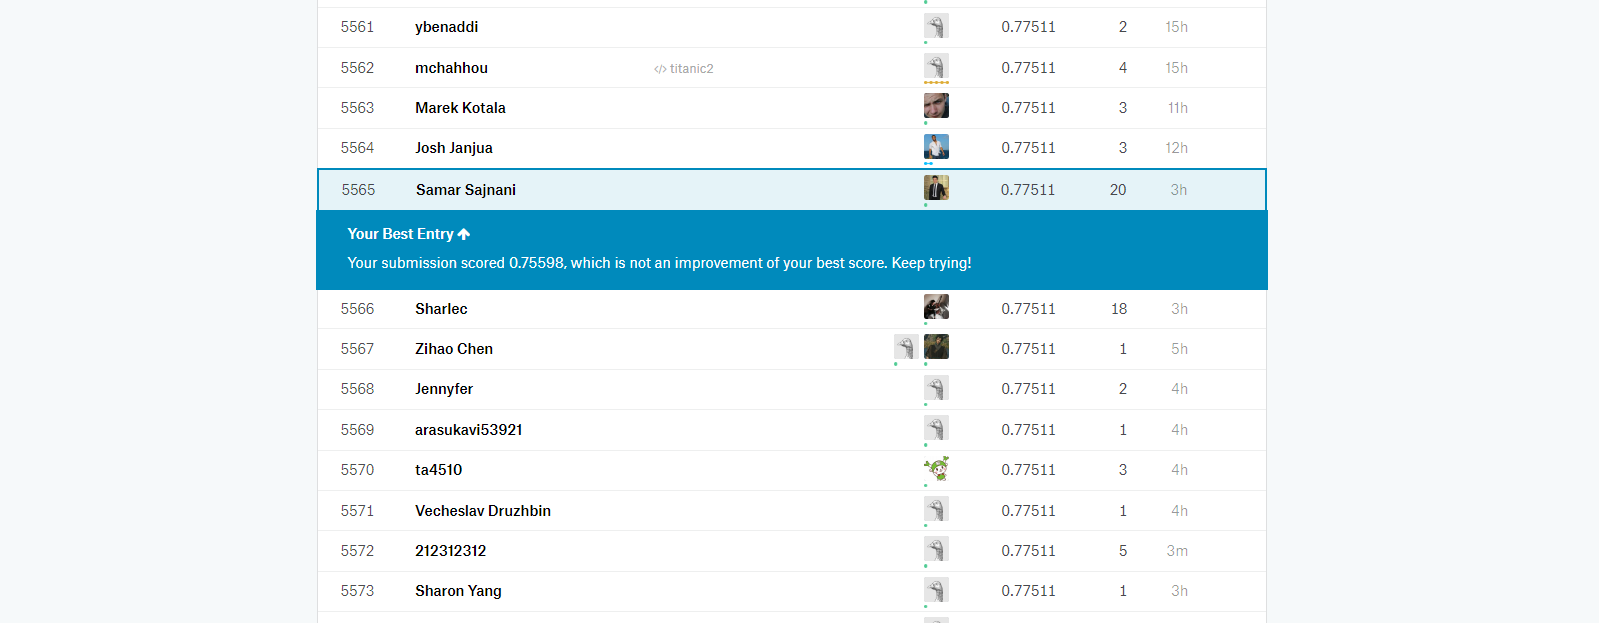

In [1938]:
from IPython.display import Image
Image(filename='../images/result.png')

## a) Best Performance is Multi-layer Perceptron (Already tested with Kaggle % showed above)

Has the best performance of all the models that were used in this assignment. 

Selected primarily because of the multiple layers and the backpropagation, with so many variables and the correlational factors being subtle it makes sense to use the power of backpropagation and multiple layers to amplify the signal.

In [1978]:

from sklearn.neural_network import MLPClassifier
clf_mlp = MLPClassifier(activation='relu', solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5,2), random_state=1)
clf_mlp.fit(titanic_prepared, titanic_results)



# print("Predictions:", model.predict(some_data_prepared))
preferred_pred = clf_mlp.predict(titanic_prepared)

# For Kaggle
# results = full_pipeline.transform(titanic_test)
# # print("Predictions:", model.predict(some_data_prepared))
# preferred_pred = clf_mlp.predict(results)
# temp_copy = submission_test.copy()
# temp_copy['Survived'] = preferred_pred
# temp_copy.to_csv('result.csv', sep=',',index=False

## b) Train Perceptron (Already tested with Kaggle % showed above)

Worse than multi-layer perceptron

In [1979]:
from sklearn.datasets import load_digits
from sklearn.linear_model import Perceptron
clf_p = Perceptron(tol=1e-3, random_state=0)
clf_p.fit(titanic_prepared, titanic_results)
# let's try the full preprocessing pipeline on a few training instances



# print("Predictions:", model.predict(some_data_prepared))
perceptron_pred = clf_p.predict(titanic_prepared)

# For Kaggle
# results = full_pipeline.transform(titanic_test)
# # print("Predictions:", model.predict(some_data_prepared))
# preferred_pred = clf_p.predict(results)
# temp_copy = submission_test.copy()
# temp_copy['Survived'] = preferred_pred
# temp_copy.to_csv('result.csv', sep=',',index=False)

## c) Best Naive Bayes is Bernoulli (Already tested with Kaggle % showed above)

Had a match accuracy of about 60% based on the data obtained from the Kaggle competition

In [1980]:
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB()
clf.fit(titanic_prepared, titanic_results)
# let's try the full preprocessing pipeline on a few training instances



# print("Predictions:", model.predict(some_data_prepared))
BN_pred = clf.predict(titanic_prepared)

# For Kaggle
# results = full_pipeline.transform(titanic_test)
# # print("Predictions:", model.predict(some_data_prepared))
# preferred_pred = clf.predict(results)
# temp_copy = submission_test.copy()
# temp_copy['Survived'] = preferred_pred
# temp_copy.to_csv('result.csv', sep=',',index=False)

## d) Random Forest Classifier (Already tested with Kaggle % showed above)

Had a match accuracy of about 65% based on the data obtained from the Kaggle competition

In [1981]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
clf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
clf.fit(titanic_prepared, titanic_results)
# let's try the full preprocessing pipeline on a few training instances



# print("Predictions:", model.predict(some_data_prepared))
r_forest_pred = clf.predict(titanic_prepared)

# For Kaggle
# results = full_pipeline.transform(titanic_test)
# # print("Predictions:", model.predict(some_data_prepared))
# preferred_pred = clf.predict(results)
# temp_copy = submission_test.copy()
# temp_copy['Survived'] = preferred_pred
# temp_copy.to_csv('result.csv', sep=',',index=False)

## e) Matched Performance of Multi-layer Perceptron

Matched the 0.7751 performance of MLP in the case where the variables alone and Prefix are dropped

In [1982]:
from sklearn.neighbors import KNeighborsClassifier
clf_knn = KNeighborsClassifier(n_neighbors=5)
clf_knn.fit(titanic_prepared, titanic_results)
# let's try the full preprocessing pipeline on a few training instances



# print("Predictions:", model.predict(some_data_prepared))
KNN_pred = clf_knn.predict(titanic_prepared)

# For Kaggle
# results = full_pipeline.transform(titanic_test)
# # print("Predictions:", model.predict(some_data_prepared))
# preferred_pred = clf_knn.predict(results)
# temp_copy = submission_test.copy()
# temp_copy['Survived'] = preferred_pred
# temp_copy.to_csv('result.csv', sep=',',index=False)

Compare against the actual values:

In [1983]:
from sklearn.metrics import mean_squared_error


print("Multi-layer Perceptron: " + str(mean_squared_error(titanic_results, preferred_pred)))
print("Perceptron: " + str(mean_squared_error(titanic_results, perceptron_pred)))
print("Bernoulli's Bayes: " + str(mean_squared_error(titanic_results, BN_pred)))
print("Random Forest: " + str(mean_squared_error(titanic_results, r_forest_pred)))
print("K-nearest Neighbor: " + str(mean_squared_error(titanic_results, KNN_pred)))


Multi-layer Perceptron: 0.12570145903479238
Perceptron: 0.2345679012345679
Bernoulli's Bayes: 0.21099887766554434
Random Forest: 0.21212121212121213
K-nearest Neighbor: 0.1335578002244669


# Step 5: Fine-tune your model

Attempting to fine-tune my model to increase the match accuracy of the model. First, I present the cross validation scores of two main models: the multi-layer perceptron and the k-Nearest Neighbour models. Second, I try searching for the optimal parameters for the MLP classifier by using a random-search and a grid-search in attempts to increase the accuracy of the model.

In [2007]:
from sklearn.model_selection import cross_val_score
preferred_pred = pd.DataFrame(preferred_pred)
scores = cross_val_score(clf_mlp, titanic_prepared, titanic_results, 
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [2008]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [0.54772256 0.4472136  0.48575205 0.46204236 0.38218767 0.44971901
 0.43704832 0.47404546 0.35156152 0.41286141]
Mean: 0.44501539752583313
Standard deviation: 0.05210197384858504


In [2009]:
KNN_pred = pd.DataFrame(KNN_pred)
knn_scores = cross_val_score(clf_knn,titanic_prepared, titanic_results,
                             scoring="neg_mean_squared_error", cv=10)
knn_rmse_scores = np.sqrt(-knn_scores)
display_scores(knn_rmse_scores)

Scores: [0.45946829 0.45946829 0.48575205 0.39661489 0.38218767 0.44971901
 0.39661489 0.43704832 0.43704832 0.39886202]
Mean: 0.4302783761443229
Standard deviation: 0.03288950887999282


**Note**: we specify `n_estimators=10` to avoid a warning about the fact that the default value is going to change to 100 in Scikit-Learn 0.22.

### Takes multiple minutes

In [ ]:
from sklearn.model_selection import GridSearchCV
clf_mlp = MLPClassifier(activation='relu', solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5,2), random_state=1)
from scipy.stats import randint
param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]


param_distribs = {
        'solver': ['lbfgs'], 'max_iter': [1000,2000 ], 'alpha': 10.0 ** -np.arange(1, 5), 'hidden_layer_sizes':np.arange(10, 15), 'random_state':[0,1,2,3,4]
    }

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(clf_mlp, param_distribs, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(titanic_prepared, titanic_results)

The best hyperparameter combination found:

In [ ]:
grid_search.best_params_

In [ ]:
grid_search.best_estimator_

Let's look at the score of each hyperparameter combination tested during the grid search:

In [ ]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

In [ ]:
pd.DataFrame(grid_search.cv_results_)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neural_network import MLPClassifier
clf_mlp = MLPClassifier(activation='relu', solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5,2), random_state=1)
from scipy.stats import randint

param_distribs = {
        'solver': ['lbfgs'], 'max_iter': [1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000 ], 'alpha': 10.0 ** -np.arange(1, 10), 'hidden_layer_sizes':np.arange(10, 15), 'random_state':[0,1,2,3,4,5,6,7,8,9]
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(clf_mlp, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(titanic_prepared, titanic_results)

In [ ]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

In [ ]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

In [ ]:

#cat_encoder = cat_pipeline.named_steps["cat_encoder"] # old solution
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

In [ ]:
final_model = grid_search.best_estimator_
final_predictions = final_model.predict(titanic_prepared)
results = full_pipeline.transform(titanic_test)
print(titanic.info())
print(titanic_test.info())
kaggle_predictions = final_model.predict(results)
temp_copy = submission_test.copy()
temp_copy['Survived'] = kaggle_predictions
temp_copy.loc[temp_copy['Survived'] >= 0.5, 'Survived'] = 1
temp_copy.loc[temp_copy['Survived'] < 0.5, 'Survived'] = 0
temp_copy['Survived'] = temp_copy['Survived'].astype(int)
temp_copy.to_csv('result.csv', sep=',',index=False)
final_mse = mean_squared_error(titanic_results, final_predictions)
final_rmse = np.sqrt(final_mse)

In [ ]:
final_rmse

We can compute a 95% confidence interval for the test RMSE:

In [ ]:
from scipy import stats

In [ ]:
confidence = 0.95
squared_errors = (final_predictions - titanic_results) ** 2
mean = squared_errors.mean()
m = len(squared_errors)

np.sqrt(stats.t.interval(confidence, m - 1,
                         loc=np.mean(squared_errors),
                         scale=stats.sem(squared_errors)))

We could compute the interval manually like this:

In [ ]:
tscore = stats.t.ppf((1 + confidence) / 2, df=m - 1)
tmargin = tscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - tmargin), np.sqrt(mean + tmargin)

Alternatively, we could use a z-scores rather than t-scores:

In [ ]:
zscore = stats.norm.ppf((1 + confidence) / 2)
zmargin = zscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - zmargin), np.sqrt(mean + zmargin)

# Extra Work
### The next three rows were my attempt at Linear Regression prediction of Cabin Letters, Embarked values, and other information. The linear regression model did not work well with the categorical data. Submission to Kaggle yielded around 65% accuracy.

In [1890]:
# def getTestAndResults(titanic_temp, test_set):
#     dfDummiesTest = pd.get_dummies(test_set['Sex'])
#     test_set_cabin = pd.concat([test_set, test_set['Cabin'].str.slice(start=1).str.split(" ", n = 1, expand = True)[0], test_set['Cabin'].str.slice(stop=1)], axis=1)
#     test_set_cabin.columns.values[12] = "Cabin_Letter"
#     test_set_cabin.rename(columns = {0: "Cabin_Number"}, inplace = True)
#     test_set_cabin.loc[test_set_cabin.Cabin.isnull(), test_set_cabin.columns.str.startswith("Cabin_Number")] = np.nan
#     test_set_cabin['Cabin_Number'] = test_set_cabin['Cabin_Number'].fillna(-1)
#     test_set_cabin['Cabin_Number'] = test_set_cabin.Cabin_Number.convert_objects(convert_numeric=True)
#     test_set_cabin['Cabin_Number'] = test_set_cabin['Cabin_Number'].replace(-1, np.nan)
#     letter_array = ['A','B','C','D','E','F','G','T']
#     letterDummiesTest = pd.get_dummies(test_set_cabin['Cabin_Letter'], prefix='Cabin_Letter')
#     letterDummiesTest = letterDummiesTest.reindex(columns=['Cabin_Letter_' + s for s in letter_array], fill_value=0)    
#     letterDummiesTest.loc[test_set_cabin.Cabin_Letter.isnull(), letterDummiesTest.columns.str.startswith("Cabin_Letter_")] = np.nan
#     embarkedDummiesTest = pd.get_dummies(test_set_cabin['Embarked'], prefix='Embarked')
#     embarkedDummiesTest = embarkedDummiesTest.reindex(columns=['Embarked_' + s for s in ['C', 'Q', 'S']], fill_value=0)
#     embarkedDummiesTest.loc[test_set_cabin.Embarked.isnull(), embarkedDummiesTest.columns.str.startswith("Embarked_")] = np.nan
#     test_set_cabin = pd.concat([test_set_cabin, dfDummiesTest, letterDummiesTest, embarkedDummiesTest], axis=1)
#     test_set_cabin.drop(['Name', 'Ticket'], axis=1, inplace=True)
#     test_set1 = test_set_cabin.copy()
#     listOfEvidence = test_set_cabin.columns[~test_set_cabin.isnull().any()].tolist()
#     listOfNulls = test_set_cabin.columns[test_set_cabin.isnull().any()].tolist()
#     remove_items = ['PassengerId', 'Embarked', 'Cabin', 'Cabin_Letter', 'Sex']
#     for item in remove_items:
#         if (item in listOfEvidence):
#             listOfEvidence.remove(item)
#         if (item in listOfNulls):
#             listOfNulls.remove(item)
#         if (item in test_set_cabin.columns):
#             del test_set_cabin[item]
#     for null_type in listOfNulls:
#         numeric_vars = listOfEvidence
#         null_rows = titanic_temp[numeric_vars + [null_type]].isnull().any(1)  # rows where Age or any feature var. is null
#         lr = LinearRegression()
#         lr.fit(titanic_temp.loc[~null_rows, numeric_vars], titanic_temp.loc[~null_rows, null_type])
#         null_rows = test_set_cabin[numeric_vars + [null_type]].isnull().any(1)
#         test_set_cabin.loc[null_rows, null_type] = lr.predict(test_set_cabin.loc[null_rows, numeric_vars])
#         listOfEvidence.append(null_type)
#     categorical = ['Embarked_', 'Cabin_Letter_']
#     for cat in categorical:
#         category_array = ['C','Q','S']
#         category = ''
#         if cat == 'Cabin_Letter_':
#             category_array = letter_array   
#         for letter in category_array:
#             null_embarked = test_set1.loc[test_set1[cat+letter].isnull()]
#             for index, row in null_embarked.iterrows():
#                 max_val = row[[cat + s for s in category_array]].max()
#                 if row[cat+letter] == max_val:
#                     print('here')
#                     test_set_cabin.at[index, cat+letter] = 1.0
#                 else:
#                     test_set_cabin.at[index, cat+letter] = 0.0
#     return test_set_cabin
        

In [1891]:

# def getTrainingAndResults(titanic_temp): 
#     dfDummies = pd.get_dummies(titanic_temp['Sex'])
#     reg_titanic = pd.concat([titanic_temp, dfDummies], axis=1)
#     numeric_vars = ['Pclass', 'SibSp', 'Parch', 'Fare', 'Survived', 'male', 'female']
#     titanic = titanic_temp.copy()
#     titanic.head(20)

#     null_rows = reg_titanic[numeric_vars + ['Age']].isnull().any(1)  # rows where Age or any feature var. is null
#     lr = LinearRegression()
#     lr.fit(reg_titanic.loc[~null_rows, numeric_vars], reg_titanic.loc[~null_rows, 'Age'])
#     titanic.loc[null_rows, 'Age'] = lr.predict(reg_titanic.loc[null_rows, numeric_vars])


#     # titanic.Age.fillna(mean_age, inplace = True)
#     titanic.loc[titanic['Age'] < 0, 'Age'] = 1
#     titanic_copy = titanic.copy()
#     titanic_split_cabin = pd.concat([titanic_copy, titanic_copy['Cabin'].str.slice(start=1).str.split(" ", n = 1, expand = True)[0], titanic_copy['Cabin'].str.slice(stop=1)], axis=1)
#     titanic_split_cabin.columns.values[13] = "Cabin_Letter"
#     titanic_split_cabin.rename(columns = {0: "Cabin_Number"}, inplace = True)


#     letterDummies = pd.get_dummies(titanic_split_cabin['Cabin_Letter'], dummy_na=True)
#     letterDummies.columns.values[8] = "nan"
#     letterDummies.loc[letterDummies.nan == 1, letterDummies.columns.str.startswith("")] = np.nan
#     del letterDummies['nan']
#     dfDummies = pd.get_dummies(titanic_split_cabin['Sex'])
#     embarkedDummies = pd.get_dummies(titanic_split_cabin['Embarked'], dummy_na=True)
#     embarkedDummies.columns.values[3] = "nan"
#     embarkedDummies.loc[embarkedDummies.nan == 1, embarkedDummies.columns.str.startswith("")] = np.nan
#     del embarkedDummies['nan']
#     floor_embarked = pd.concat([titanic_split_cabin, embarkedDummies, dfDummies], axis=1)
#     floor_embarked['Cabin_Number'] = floor_embarked['Cabin_Number'].fillna(-1)
#     floor_embarked['Cabin_Number'] = floor_embarked.Cabin_Number.convert_objects(convert_numeric=True)
#     floor_embarked['Cabin_Number'] = floor_embarked['Cabin_Number'].replace(-1, np.nan)
#     numeric_vars = ['Pclass', 'SibSp', 'Parch', 'Fare', 'Survived', 'male', 'female']
#     cabin_num_and_embarked = ['Cabin_Number', 'C','Q','S']
#     for i in cabin_num_and_embarked:
#         null_rows = floor_embarked[numeric_vars + [i]].isnull().any(1)  # rows where Age or any feature var. is null
#         lr = LinearRegression()
#         lr.fit(floor_embarked.loc[~null_rows, numeric_vars], floor_embarked.loc[~null_rows, i])
#         floor_embarked.loc[null_rows, i] = lr.predict(floor_embarked.loc[null_rows, numeric_vars])
#     floor_embarked.loc[floor_embarked['Cabin_Number'] < 0, 'Cabin_Number'] = 0
#     null_embarked = floor_embarked.loc[floor_embarked['Embarked'].isnull()]
#     for index, row in null_embarked.iterrows():
#         max_val = row[['C','Q','S']].max()
#         for embarked in ['C','Q','S']:
#             if row[embarked] == max_val:
#                 floor_embarked.at[index, embarked] = 1.0
#             else:
#                 floor_embarked.at[index, embarked] = 0.0

#     floor_embarked = pd.concat([floor_embarked, letterDummies], axis=1)
#     floor_embarked_a = floor_embarked.copy()


#     floor_embarked.columns.values[14] = "C1"


#     numeric_vars = ['Pclass', 'SibSp', 'Parch', 'Fare', 'Survived', 'male', 'female']
#     cabin_letters = ['A','B','C','D','E','F','G','T']
#     for i in cabin_letters:
#         null_rows = floor_embarked[numeric_vars + [i]].isnull().any(1)  # rows where Age or any feature var. is null
#         lr = LinearRegression()
#         lr.fit(floor_embarked.loc[~null_rows, numeric_vars], floor_embarked.loc[~null_rows, i])
#         floor_embarked.loc[null_rows, i] = lr.predict(floor_embarked.loc[null_rows, numeric_vars])

#     null_embarked = floor_embarked.loc[floor_embarked['Cabin'].isnull()]
#     count = 0
#     for index, row in null_embarked.iterrows():
#         max_val = row[cabin_letters].max()
#         for letter in cabin_letters:
#             if row[letter] == max_val:
#                 floor_embarked.loc[row.PassengerId-1, letter] = 1.0
#             else:
#                 floor_embarked.loc[row.PassengerId-1, letter] = 0.0

#     floor_embarked.drop(['Name', 'Sex', 'Ticket', 'Cabin', 'Cabin_Letter', 'Embarked', 'PassengerId'], axis=1, inplace=True)
#     floor_embarked = floor_embarked.rename(columns={'A': 'Cabin_Letter_A', 'B': 'Cabin_Letter_B', 'C': 'Cabin_Letter_C', 'D': 'Cabin_Letter_D', 'E': 'Cabin_Letter_E', 'F': 'Cabin_Letter_F', 'G': 'Cabin_Letter_G', 'T': 'Cabin_Letter_T', 'C1': 'Embarked_C', 'Q': 'Embarked_Q', 'S': 'Embarked_S'})
#     results = floor_embarked['Survived']
#     del floor_embarked['Survived']
#     training = floor_embarked
#     return training, results

# titanic_train, predict_survived = getTrainingAndResults(titanic_temp)

# test_check = getTestAndResults(titanic_train, titanic_test)

In [1892]:
# from sklearn.datasets import load_digits
# from sklearn.linear_model import Perceptron
# #Create a Gaussian Classifier
# model = Perceptron(tol=1e-3, random_state=0)
# model.fit(titanic_train, predict_survived)


# # Predict Output 
# predicted= model.predict(test_check)
# print(len(predicted))
# print(len(submission_test))

# submission_test['Survived'] = predicted
# submission_test.to_csv('result.csv', sep=',',index=False)
